<a href="https://colab.research.google.com/github/buiquanghuy20130276/FE-News-ReacJs/blob/master/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import thư viện cần sử dụng**


In [1]:
import pandas as pd
import urllib.request
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## **1. Import dataset Abalone**

In [2]:
# đường dẫn đến file Abalone.data
url_data = 'https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'
filename_data = 'abalone.data'

# tải tập tin Abalone.data và lưu vào file
urllib.request.urlretrieve(url_data, filename_data)

# đường dẫn đến file Abalone.names
url_names = 'https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.names'
filename_names = 'abalone.names'

# tải tập tin Abalone.names và lưu vào file
urllib.request.urlretrieve(url_names, filename_names)

# đọc tên cột từ file Abalone.names
with open(filename_names) as f:
    column_names = []
    for line in f:
        if line.startswith('1.'):
            column_names.append(line.split(':')[0])

# đọc dữ liệu từ file Abalone.data và tạo dataframe
df = pd.read_csv(filename_data, header=None, names=column_names)
df = pd.read_csv('abalone.data', header=None, names=['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings'])

# chuyển đổi dữ liệu category sang số
df = pd.get_dummies(df, columns=['Sex'])

# chuyển đổi biến Rings thành biến rời rạc
df['Rings_cat'] = pd.cut(df['Rings'], bins=[0, 8, 10, 30], labels=['low', 'medium', 'high'])

# chuẩn hóa dữ liệu
scaler = StandardScaler()
df[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']] = scaler.fit_transform(df[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']])

print(df.head())
# tách tập train và tập test
X = df.drop(['Rings', 'Rings_cat'], axis=1)
y = df['Rings_cat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


     Length  Diameter    Height  Whole weight  Shucked weight  Viscera weight  \
0 -0.574558 -0.432149 -1.064424     -0.641898       -0.607685       -0.726212   
1 -1.448986 -1.439929 -1.183978     -1.230277       -1.170910       -1.205221   
2  0.050033  0.122130 -0.107991     -0.309469       -0.463500       -0.356690   
3 -0.699476 -0.432149 -0.347099     -0.637819       -0.648238       -0.607600   
4 -1.615544 -1.540707 -1.423087     -1.272086       -1.215968       -1.287337   

   Shell weight  Rings  Sex_F  Sex_I  Sex_M Rings_cat  
0     -0.638217     15      0      0      1      high  
1     -1.212987      7      0      0      1       low  
2     -0.207139      9      1      0      0    medium  
3     -0.602294     10      0      0      1    medium  
4     -1.320757      7      0      1      0       low  


# **2. Giai đoạn tiền xử lý dữ liệu cho tập dữ liệu Abalone**


*   Kiểm tra dữ liệu bị thiếu (missing data)


> Ta có thể kiểm tra dữ liệu bị thiếu bằng cách sử dụng phương thức isna() của pandas. Nếu tìm thấy dữ liệu bị thiếu, ta có thể thay thế nó bằng các giá trị khác hoặc xóa các hàng bị thiếu tương ứng.


*   Xử lý dữ liệu dạng category


> Các thuộc tính dạng category trong tập dữ liệu Abalone là "Sex", ta có thể chuyển đổi chúng sang dạng số bằng phương thức **pd.get_dummies()** của pandas.


*   Chuẩn hóa dữ liệu


> Các thuộc tính trong tập dữ liệu Abalone có phạm vi giá trị khác nhau, ta có thể chuẩn hóa chúng bằng cách sử dụng các phương pháp như MinMaxScaler, StandardScaler, hoặc RobustScaler.



> Trong ví dụ này, chúng ta sử dụng phương thức **isna().sum()** để kiểm tra xem có bao nhiêu dữ liệu bị thiếu. Sau đó, chúng ta sử dụng phương thức **pd.get_dummies()** để chuyển đổi thuộc tính category **"Sex"** thành dạng số. Cuối cùng, chúng ta sử dụng **StandardScaler()** để chuẩn hóa dữ liệu các thuộc tính số trong dataframe.


In [3]:

# đọc tập dữ liệu
df = pd.read_csv('abalone.data', header=None, names=['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings'])

# kiểm tra dữ liệu bị thiếu
print(df.isna().sum())

# chuyển đổi dữ liệu category sang số
df = pd.get_dummies(df, columns=['Sex'])

# chuẩn hóa dữ liệu
scaler = StandardScaler()
df[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']] = scaler.fit_transform(df[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']])

# hiển thị vài dòng đầu của dataframe
print(df.head())


Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64
     Length  Diameter    Height  Whole weight  Shucked weight  Viscera weight  \
0 -0.574558 -0.432149 -1.064424     -0.641898       -0.607685       -0.726212   
1 -1.448986 -1.439929 -1.183978     -1.230277       -1.170910       -1.205221   
2  0.050033  0.122130 -0.107991     -0.309469       -0.463500       -0.356690   
3 -0.699476 -0.432149 -0.347099     -0.637819       -0.648238       -0.607600   
4 -1.615544 -1.540707 -1.423087     -1.272086       -1.215968       -1.287337   

   Shell weight     Rings  Sex_F  Sex_I  Sex_M  
0     -0.638217  1.571544      0      0      1  
1     -1.212987 -0.910013      0      0      1  
2     -0.207139 -0.289624      1      0      0  
3     -0.602294  0.020571      0      0      1  
4     -1.320757 -0.910013      0      1      0  


Để so sánh kết quả của các thuật toán trên tập dữ liệu Abalone, ta có thể sử dụng các phương pháp cross-validation và tính toán các metrics như Accuracy, Precision, Recall và F1.

Dưới đây là một số thuật toán thường được sử dụng trong bài toán regression và classification, cùng với cách sử dụng chúng và các metrics được tính toán:


1.   **Neural network:**


*   Sử dụng mạng neural với các layer ẩn để huấn luyện mô hình.

*   Metrics: MSE (Mean Squared Error) cho bài toán regression, và Accuracy, Precision, Recall và F1 cho bài toán classification.


2. **SVM (Support Vector Machine):**


*   Sử dụng SVM với các kernel như linear, polynomial, RBF (Radial Basis Function), sigmoid,...

*   Metrics: MSE cho bài toán regression, và Accuracy, Precision, Recall và F1 cho bài toán classification.


3. **kNN (k-Nearest Neighbors):**


*   Sử dụng kNN để tìm k điểm gần nhất và lấy trung bình (bài toán regression) hoặc phân loại bằng đa số (bài toán classification) của các điểm này.
*  Metrics: MSE cho bài toán regression, và Accuracy, Precision, Recall và F1 cho bài toán classification.


4. **Naïve Bayes:**


*   Sử dụng Naïve Bayes với các giả định độc lập giữa các thuộc tính để tính xác suất xảy ra của từng lớp.

*   Metrics: Accuracy, Precision, Recall và F1 cho bài toán classification.

5. **RandomForest:**


*  Sử dụng RandomForest để tạo ra nhiều decision trees và lấy trung bình kết quả của chúng.

*   Metrics: MSE cho bài toán regression, và Accuracy, Precision, Recall và F1 cho bài toán classification.


6. **Decision Tree:**


*   Sử dụng Decision Tree để tạo ra cây quyết định và phân loại các điểm dữ liệu theo các quy tắc.

*  Metrics: MSE cho bài toán regression, và Accuracy, Precision, Recall và F1 cho bài toán classification.


7. **Thuật toán Regression:**
*   Sử dụng các thuật toán regression như Linear Regression, Ridge Regression, Lasso Regression,... để dự đoán giá trị đầu ra.
*   Metrics: MSE cho bài toán regression.
8. **Thuật toán Clustering:**
*   Sử dụng các thuật toán clustering như K-means, Hierarchical Clustering,... để phân loại các điểm dữ liệu vào các cụm.

*   Metrics: Không có metrics chính xác cho clustering, nhưng có thể sử dụng các metrics như silhouette score để đánh giá chất lượng của các cụm.

Để huấn luyện và đánh giá các thuật toán máy học trên tập dữ liệu Abalone, ta sẽ chia tập dữ liệu thành 2 phần: tập huấn luyện và tập kiểm tra. Ta sẽ sử dụng 70% dữ liệu cho tập huấn luyện và 30% dữ liệu cho tập kiểm tra.

Trước khi chia tập dữ liệu, ta cần chuyển đổi các biến phân loại thành dạng số và chuẩn hóa dữ liệu.

Để chuyển đổi biến phân loại thành dạng số, ta sẽ sử dụng phương pháp One-Hot Encoding. Đây là phương pháp chuyển đổi biến phân loại thành các biến giả tạo với giá trị 0 hoặc 1. Với mỗi giá trị của biến phân loại, ta sẽ tạo ra một biến giả tạo tương ứng. Nếu giá trị của biến phân loại là giá trị đó, biến giả tạo tương ứng sẽ có giá trị bằng 1, ngược lại sẽ có giá trị bằng 0.

Để chuẩn hóa dữ liệu, ta sẽ sử dụng phương pháp StandardScaler. Đây là phương pháp chuẩn hóa dữ liệu bằng cách chuyển đổi dữ liệu thành các giá trị có trung bình bằng 0 và độ lệch chuẩn bằng 1.

Tiếp theo, ta sẽ chia tập dữ liệu và huấn luyện các thuật toán máy học. Ta sẽ sử dụng các thuật toán như Neural network, SVM, kNN, Naïve Bayes, RandomForest và Decision Tree.

Cuối cùng, ta sẽ đánh giá kết quả của các thuật toán bằng các metrics như Accuracy, Precision, Recall và F1.

**Chúng ta sẽ áp dụng phương pháp RFE để chọn ra 5 đặc trưng quan trọng nhất từ dữ liệu Abalone đã tiền xử lý.**

In [4]:
lr = LinearRegression()
rfe = RFE(lr, n_features_to_select=5)
X_train = df.drop('Rings', axis=1)
y_train = df['Rings']

rfe.fit(X_train, y_train)
important_features = X_train.columns[rfe.support_]
print(important_features)



Index(['Diameter', 'Whole weight', 'Shucked weight', 'Viscera weight',
       'Shell weight'],
      dtype='object')


Accuracy: 0.611244019138756
Precision: 0.600215621127924
Recall: 0.611244019138756
F1 score: 0.6011440917677388


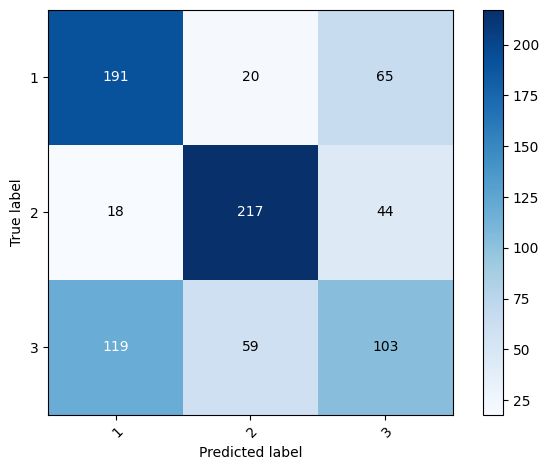

In [7]:
# đường dẫn đến file Abalone.data
url_data = 'https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'
filename_data = 'abalone.data'

# tải tập tin Abalone.data và lưu vào file
urllib.request.urlretrieve(url_data, filename_data)

# đường dẫn đến file Abalone.names
url_names = 'https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.names'
filename_names = 'abalone.names'

# tải tập tin Abalone.names và lưu vào file
urllib.request.urlretrieve(url_names, filename_names)

# đọc tên cột từ file Abalone.names
with open(filename_names) as f:
    column_names = []
    for line in f:
        if line.startswith('1.'):
            column_names.append(line.split(':')[0])

# đọc dữ liệu từ file Abalone.data và tạo dataframe
df = pd.read_csv(filename_data, header=None, names=column_names)
df = pd.read_csv('abalone.data', header=None, names=['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings'])

# chuyển đổi dữ liệu category sang số
df = pd.get_dummies(df, columns=['Sex'])

# chuyển đổi biến Rings thành biến rời rạc
df['Rings_cat'] = pd.cut(df['Rings'], bins=[0, 8, 10, 30], labels=['low', 'medium', 'high'])

# chuẩn hóa dữ liệu
scaler = StandardScaler()
df[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']] = scaler.fit_transform(df[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']])

# tách tập train và tập test
X = df.drop(['Rings', 'Rings_cat'], axis=1)
y = df['Rings_cat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

# tạo mô hình kNN với k = 5
knn = KNeighborsClassifier(n_neighbors=5)

# huấn luyện mô hình trên tập dữ liệu huấn luyện
knn.fit(X_train, y_train)

# sử dụng mô hình để dự đoán trên tập dữ liệu kiểm tra
y_pred = knn.predict(X_test)

# tính toán các metric
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# in kết quả các metric
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")

# tính toán Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# vẽ biểu đồ Confusion Matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=range(1, len(np.unique(y_train))+1), yticklabels=range(1, len(np.unique(y_train))+1),
       xlabel='Predicted label',
       ylabel='True label')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > cm.max() / 2. else "black")
fig.tight_layout()
plt.show()


**Sử dụng SVM**

Accuracy: 0.6566985645933014
Precision: 0.6514143834745758
Recall: 0.6566985645933014
F1 score: 0.6533655417490242


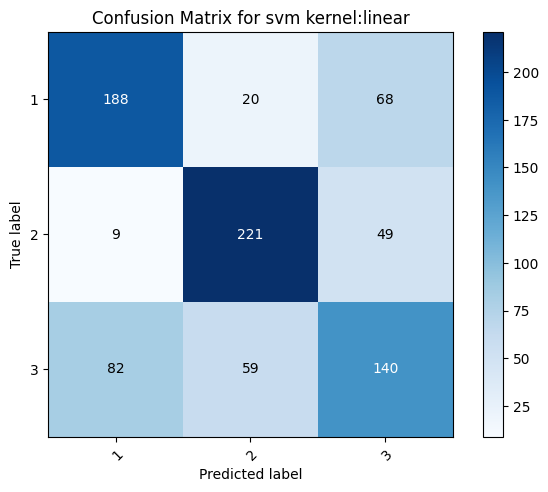

In [8]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

# tạo mô hình SVM
svm = SVC(kernel='linear')

# huấn luyện mô hình trên tập dữ liệu huấn luyện
svm.fit(X_train, y_train)

# sử dụng mô hình để dự đoán trên tập dữ liệu kiểm tra
y_pred = svm.predict(X_test)

# tính toán các metric
accuracy_lili = accuracy_score(y_test, y_pred)
precision_lili= precision_score(y_test, y_pred, average='weighted')
recall_lili = recall_score(y_test, y_pred, average='weighted')
f1_lili = f1_score(y_test, y_pred, average='weighted')

# in kết quả các metric
print(f"Accuracy: {accuracy_lili}")
print(f"Precision: {precision_lili}")
print(f"Recall: {recall_lili}")
print(f"F1 score: {f1_lili}")

# tính toán Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# vẽ biểu đồ Confusion Matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=range(1, len(np.unique(y_train))+1), yticklabels=range(1, len(np.unique(y_train))+1),
       xlabel='Predicted label',
       ylabel='True label')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > cm.max() / 2. else "black")
fig.tight_layout()
plt.title('Confusion Matrix for svm kernel:linear')
plt.show()


**Kernel: rbf**

Accuracy (rbf kernel): 0.6602870813397129
Precision (rbf kernel): 0.6553835027577638
Recall (rbf kernel): 0.6602870813397129
F1 score (rbf kernel): 0.65544204374946


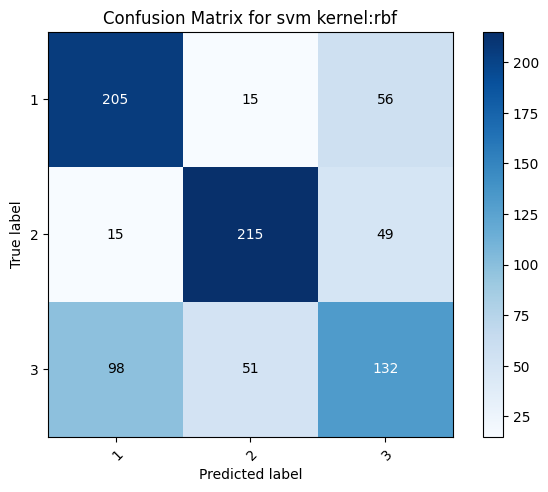

In [9]:
# tạo mô hình SVM với kernel rbf
svm_rbf = SVC(kernel='rbf')

# huấn luyện mô hình trên tập dữ liệu huấn luyện
svm_rbf.fit(X_train, y_train)

# sử dụng mô hình để dự đoán trên tập dữ liệu kiểm tra
y_pred_rbf = svm_rbf.predict(X_test)

# tính toán các metric
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
precision_rbf = precision_score(y_test, y_pred_rbf, average='weighted')
recall_rbf = recall_score(y_test, y_pred_rbf, average='weighted')
f1_rbf = f1_score(y_test, y_pred_rbf, average='weighted')

# in kết quả các metric
print(f"Accuracy (rbf kernel): {accuracy_rbf}")
print(f"Precision (rbf kernel): {precision_rbf}")
print(f"Recall (rbf kernel): {recall_rbf}")
print(f"F1 score (rbf kernel): {f1_rbf}")

# tính toán Confusion Matrix
cm_rbf = confusion_matrix(y_test, y_pred_rbf)

# vẽ biểu đồ Confusion Matrix
fig, ax = plt.subplots()
im = ax.imshow(cm_rbf, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm_rbf.shape[1]),
       yticks=np.arange(cm_rbf.shape[0]),
       xticklabels=range(1, len(np.unique(y_train))+1), yticklabels=range(1, len(np.unique(y_train))+1),
       xlabel='Predicted label',
       ylabel='True label')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
for i in range(cm_rbf.shape[0]):
    for j in range(cm_rbf.shape[1]):
        ax.text(j, i, format(cm_rbf[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm_rbf[i, j] > cm_rbf.max() / 2. else "black")
fig.tight_layout()
plt.title('Confusion Matrix for svm kernel:rbf')
plt.show()


**Kernel: poly**


Accuracy: 0.5825358851674641
Precision: 0.6453634132544108
Recall: 0.5825358851674641
F1 score: 0.5809776998987747


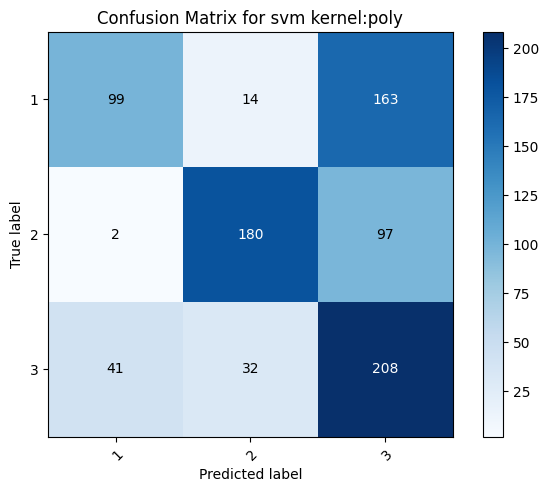

In [10]:
# tạo mô hình SVM với kernel poly
svm_poly = SVC(kernel='poly')

# huấn luyện mô hình trên tập dữ liệu huấn luyện
svm_poly.fit(X_train, y_train)

# sử dụng mô hình để dự đoán trên tập dữ liệu kiểm tra
y_pred_poly = svm_poly.predict(X_test)

# tính toán các metric
accuracy_poly = accuracy_score(y_test, y_pred_poly)
precision_poly = precision_score(y_test, y_pred_poly, average='weighted')
recall_poly = recall_score(y_test, y_pred_poly, average='weighted')
f1_poly = f1_score(y_test, y_pred_poly, average='weighted')

# in kết quả các metric
print(f"Accuracy: {accuracy_poly}")
print(f"Precision: {precision_poly}")
print(f"Recall: {recall_poly}")
print(f"F1 score: {f1_poly}")

# tính toán Confusion Matrix
cm_poly = confusion_matrix(y_test, y_pred_poly)

# vẽ biểu đồ Confusion Matrix
fig, ax = plt.subplots()
im = ax.imshow(cm_poly, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm_poly.shape[1]),
       yticks=np.arange(cm_poly.shape[0]),
       xticklabels=range(1, len(np.unique(y_train))+1), yticklabels=range(1, len(np.unique(y_train))+1),
       xlabel='Predicted label',
       ylabel='True label')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
for i in range(cm_poly.shape[0]):
    for j in range(cm_poly.shape[1]):
        ax.text(j, i, format(cm_poly[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm_poly[i, j] > cm_poly.max() / 2. else "black")
fig.tight_layout()
plt.title('Confusion Matrix for svm kernel:poly')
plt.show()


**Kernel: sigmoid**


Accuracy: 0.4473684210526316
Precision: 0.43716164153564663
Recall: 0.4473684210526316
F1 score: 0.40968986395484125


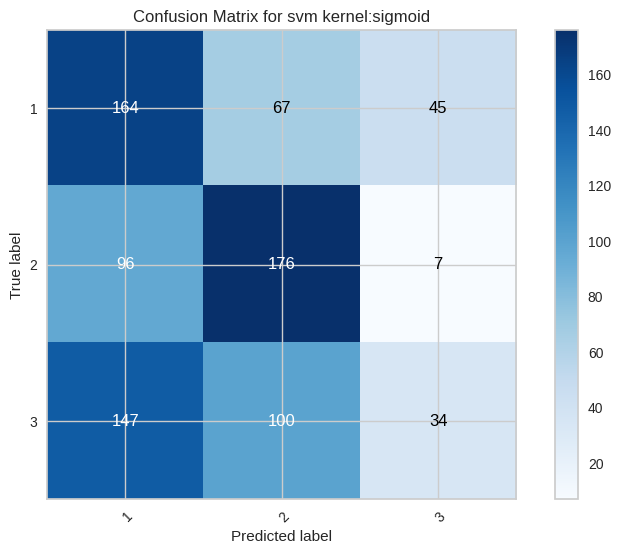

In [12]:
# tạo mô hình SVM với kernel sigmoid
svm_sigmoid = SVC(kernel='sigmoid')

# huấn luyện mô hình trên tập dữ liệu huấn luyện
svm_sigmoid.fit(X_train, y_train)

# sử dụng mô hình để dự đoán trên tập dữ liệu kiểm tra
y_pred_sigmoid = svm_sigmoid.predict(X_test)

# tính toán các metric
accuracy_sigmoid = accuracy_score(y_test, y_pred_sigmoid)
precision_sigmoid = precision_score(y_test, y_pred_sigmoid, average='weighted')
recall_sigmoid = recall_score(y_test, y_pred_sigmoid, average='weighted')
f1_sigmoid = f1_score(y_test, y_pred_sigmoid, average='weighted')

# in kết quả các metric
print(f"Accuracy: {accuracy_sigmoid}")
print(f"Precision: {precision_sigmoid}")
print(f"Recall: {recall_sigmoid}")
print(f"F1 score: {f1_sigmoid}")

# tính toán Confusion Matrix
cm_sigmoid = confusion_matrix(y_test, y_pred_sigmoid)

# vẽ biểu đồ Confusion Matrix
fig, ax = plt.subplots()
im = ax.imshow(cm_sigmoid, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm_sigmoid.shape[1]),
       yticks=np.arange(cm_sigmoid.shape[0]),
       xticklabels=range(1, len(np.unique(y_train))+1), yticklabels=range(1, len(np.unique(y_train))+1),
       xlabel='Predicted label',
       ylabel='True label')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
for i in range(cm_sigmoid.shape[0]):
    for j in range(cm_sigmoid.shape[1]):
        ax.text(j, i, format(cm_sigmoid[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm_sigmoid[i, j] > cm_sigmoid.max() / 2. else "black")
fig.tight_layout()
plt.title('Confusion Matrix for svm kernel:sigmoid')
plt.show()



So sánh các kernel

In [13]:
# tính toán các metric cho từng kernel
accuracy_linear = accuracy_lili
precision_linear = precision_lili
recall_linear = recall_lili
f1_linear = f1_lili

accuracy_poly = accuracy_score(y_test, y_pred_poly)
precision_poly = precision_score(y_test, y_pred_poly, average='weighted')
recall_poly = recall_score(y_test, y_pred_poly, average='weighted')
f1_poly = f1_score(y_test, y_pred_poly, average='weighted')

accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
precision_rbf = precision_score(y_test, y_pred_rbf, average='weighted')
recall_rbf = recall_score(y_test, y_pred_rbf, average='weighted')
f1_rbf = f1_score(y_test, y_pred_rbf, average='weighted')

accuracy_sigmoid = accuracy_score(y_test, y_pred_sigmoid)
precision_sigmoid = precision_score(y_test, y_pred_sigmoid, average='weighted')
recall_sigmoid = recall_score(y_test, y_pred_sigmoid, average='weighted')
f1_sigmoid = f1_score(y_test, y_pred_sigmoid, average='weighted')

data = {'Kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'Accuracy': [accuracy_linear, accuracy_poly, accuracy_rbf, accuracy_sigmoid],
        'Precision': [precision_linear, precision_poly, precision_rbf, precision_sigmoid],
        'Recall': [recall_linear, recall_poly, recall_rbf, recall_sigmoid],
        'F1-score': [f1_linear, f1_poly, f1_rbf, f1_sigmoid]}

df = pd.DataFrame(data)

display(df)


,Kernel,Accuracy,Precision,Recall,F1-score
0,linear,0.656699,0.651414,0.656699,0.653366
1,poly,0.582536,0.645363,0.582536,0.580978
2,rbf,0.660287,0.655384,0.660287,0.655442
3,sigmoid,0.447368,0.437162,0.447368,0.409690


**Biểu đồ so sánh**

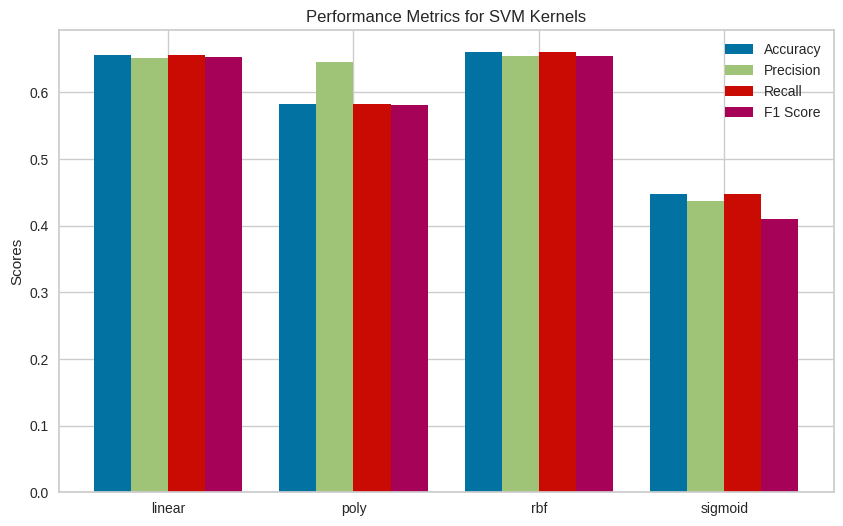

In [14]:
import matplotlib.pyplot as plt

# Tạo list chứa các giá trị metric
accuracy_scores = [accuracy_lili, accuracy_poly, accuracy_rbf, accuracy_sigmoid]
precision_scores = [precision_lili, precision_poly, precision_rbf, precision_sigmoid]
recall_scores = [recall_lili, recall_poly, recall_rbf, recall_sigmoid]
f1_scores = [f1_lili, f1_poly, f1_rbf, f1_sigmoid]

# Tạo list chứa các tên kernel
kernel_names = ['linear', 'poly', 'rbf', 'sigmoid']

# Vẽ biểu đồ cột
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(np.arange(len(kernel_names)), accuracy_scores, width=0.2, label='Accuracy')
ax.bar(np.arange(len(kernel_names))+0.2, precision_scores, width=0.2, label='Precision')
ax.bar(np.arange(len(kernel_names))+0.4, recall_scores, width=0.2, label='Recall')
ax.bar(np.arange(len(kernel_names))+0.6, f1_scores, width=0.2, label='F1 Score')

ax.set_ylabel('Scores')
ax.set_title('Performance Metrics for SVM Kernels')
ax.set_xticks(np.arange(len(kernel_names))+0.3)
ax.set_xticklabels(kernel_names)
ax.legend()

plt.show()


Trong đoạn code trên, np.arange(len(kernel_names)) được sử dụng để tạo một mảng số nguyên liên tiếp từ 0 đến số lượng kernel và sau đó được dùng để xác định vị trí của các cột trên trục x. Chúng ta cộng thêm 0.2, 0.4 và 0.6 vào vị trí này để tạo ra các cột cho các metric tương ứng.

**Sử dụng SVM với kmeans**

1.**Kernel=linear with kmeans**

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy (linear kernel): 0.5657894736842105
Precision (linear kernel): 0.5436173828443635
Recall (linear kernel): 0.5657894736842105
F1 score (linear kernel): 0.5435618947770711


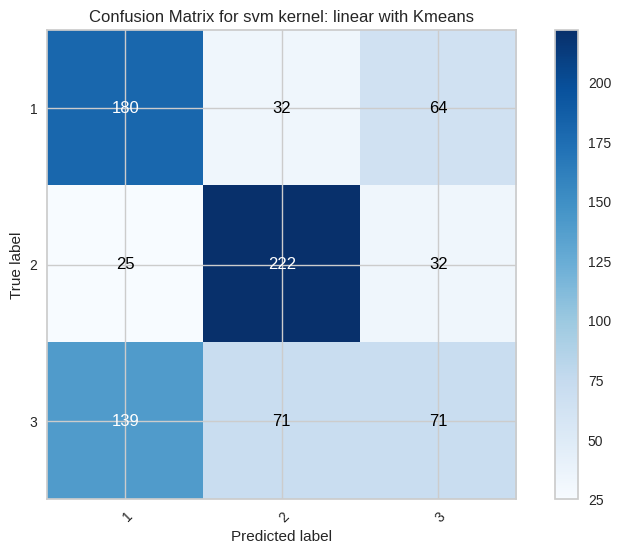

In [21]:
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# khởi tạo mô hình KMeans với số lượng cụm là 3
kmeans = KMeans(n_clusters=3)

# fit dữ liệu vào mô hình KMeans
kmeans.fit(X_train)

# sử dụng mô hình để dự đoán cụm cho từng điểm dữ liệu
cluster_labels_train = kmeans.predict(X_train)
cluster_labels_test = kmeans.predict(X_test)

# giảm chiều dữ liệu huấn luyện và dữ liệu kiểm tra bằng PCA
pca = PCA(n_components=2)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

# khởi tạo mô hình SVM với kernel tuyến tính
svm_linear = SVC(kernel='linear')

# huấn luyện mô hình trên dữ liệu huấn luyện đã được giảm chiều
svm_linear.fit(X_train_reduced, y_train)

# sử dụng mô hình để dự đoán trên dữ liệu kiểm tra đã được giảm chiều
y_pred_linear = svm_linear.predict(X_test_reduced)

# tính toán các metric
accuracy_linear = accuracy_score(y_test, y_pred_linear)
precision_linear = precision_score(y_test, y_pred_linear, average='weighted')
recall_linear = recall_score(y_test, y_pred_linear, average='weighted')
f1_linear = f1_score(y_test, y_pred_linear, average='weighted')

# in kết quả các metric
print(f"Accuracy (linear kernel): {accuracy_linear}")
print(f"Precision (linear kernel): {precision_linear}")
print(f"Recall (linear kernel): {recall_linear}")
print(f"F1 score (linear kernel): {f1_linear}")

# tính toán Confusion Matrix
cm_linear = confusion_matrix(y_test, y_pred_linear)

# vẽ biểu đồ Confusion Matrix
fig, ax = plt.subplots()
im = ax.imshow(cm_linear, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm_linear.shape[1]),
       yticks=np.arange(cm_linear.shape[0]),
       xticklabels=range(1, len(np.unique(y_train))+1), yticklabels=range(1, len(np.unique(y_train))+1),
       xlabel='Predicted label',
       ylabel='True label')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
for i in range(cm_linear.shape[0]):
    for j in range(cm_linear.shape[1]):
        ax.text(j, i, format(cm_linear[i, j], 'd'),
                ha="center",va="center", color="white" if cm_linear[i, j] > cm_linear.max() / 2. else "black")
fig.tight_layout()
plt.title('Confusion Matrix for svm kernel: linear with Kmeans')
plt.show()


**2. kernel=poly with kmeans**

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy (polynomial kernel): 0.5382775119617225
Precision (polynomial kernel): 0.5788284735653157
Recall (polynomial kernel): 0.5382775119617225
F1 score (polynomial kernel): 0.5482675408596007


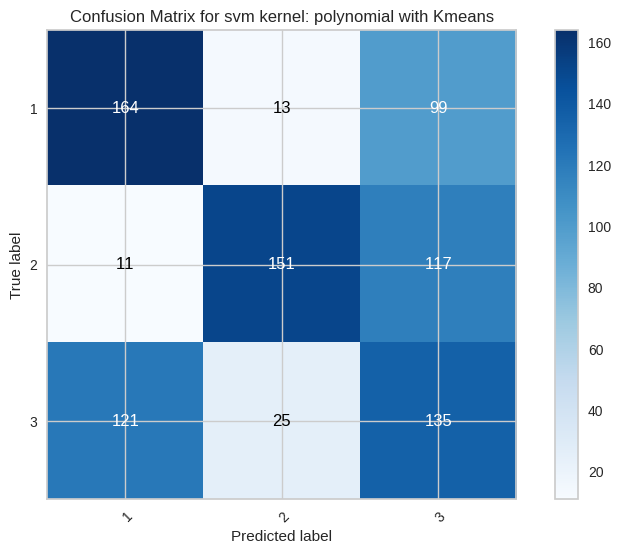

In [22]:
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# khởi tạo mô hình KMeans với số lượng cụm là 3
kmeans = KMeans(n_clusters=3)

# fit dữ liệu vào mô hình KMeans
kmeans.fit(X_train)

# sử dụng mô hình để dự đoán cụm cho từng điểm dữ liệu
cluster_labels_train = kmeans.predict(X_train)
cluster_labels_test = kmeans.predict(X_test)

# giảm chiều dữ liệu huấn luyện và dữ liệu kiểm tra bằng PCA
pca = PCA(n_components=2)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

# khởi tạo mô hình SVM với kernel đa thức
svm_poly = SVC(kernel='poly', degree=3)

# huấn luyện mô hình trên dữ liệu huấn luyện đã được giảm chiều
svm_poly.fit(X_train_reduced, y_train)

# sử dụng mô hình để dự đoán trên dữ liệu kiểm tra đã được giảm chiều
y_pred_poly = svm_poly.predict(X_test_reduced)

# tính toán các metric
accuracy_poly = accuracy_score(y_test, y_pred_poly)
precision_poly = precision_score(y_test, y_pred_poly, average='weighted')
recall_poly = recall_score(y_test, y_pred_poly, average='weighted')
f1_poly = f1_score(y_test, y_pred_poly, average='weighted')

# in kết quả các metric
print(f"Accuracy (polynomial kernel): {accuracy_poly}")
print(f"Precision (polynomial kernel): {precision_poly}")
print(f"Recall (polynomial kernel): {recall_poly}")
print(f"F1 score (polynomial kernel): {f1_poly}")

# tính toán Confusion Matrix
cm_poly = confusion_matrix(y_test, y_pred_poly)

# vẽ biểu đồ Confusion Matrix
fig, ax = plt.subplots()
im = ax.imshow(cm_poly, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm_poly.shape[1]),
       yticks=np.arange(cm_poly.shape[0]),
       xticklabels=range(1, len(np.unique(y_train))+1), yticklabels=range(1, len(np.unique(y_train))+1),
       xlabel='Predicted label',
       ylabel='True label')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
for i in range(cm_poly.shape[0]):
    for j in range(cm_poly.shape[1]):
        ax.text(j, i, format(cm_poly[i, j], 'd'),
                ha="center",va="center", color="white" if cm_poly[i, j] > cm_poly.max() / 2. else "black")
fig.tight_layout()
plt.title('Confusion Matrix for svm kernel: polynomial with Kmeans')
plt.show()


**3. kernel=sigmoid with kmeans**

Accuracy (sigmoid kernel): 0.4342105263157895
Precision (sigmoid kernel): 0.4173603340945811
Recall (sigmoid kernel): 0.4342105263157895
F1 score (sigmoid kernel): 0.3875078099222951


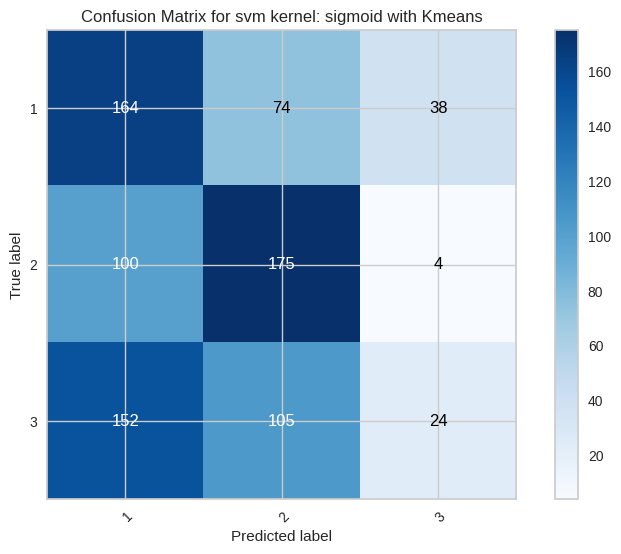

In [25]:
svm_sigmoid = SVC(kernel='sigmoid')
svm_sigmoid.fit(X_train_reduced, y_train)
y_pred_sigmoid = svm_sigmoid.predict(X_test_reduced)

accuracy_sigmoid = accuracy_score(y_test, y_pred_sigmoid)
precision_sigmoid = precision_score(y_test, y_pred_sigmoid, average='weighted')
recall_sigmoid = recall_score(y_test, y_pred_sigmoid, average='weighted')
f1_sigmoid = f1_score(y_test, y_pred_sigmoid, average='weighted')

print(f"Accuracy (sigmoid kernel): {accuracy_sigmoid}")
print(f"Precision (sigmoid kernel): {precision_sigmoid}")
print(f"Recall (sigmoid kernel): {recall_sigmoid}")
print(f"F1 score (sigmoid kernel): {f1_sigmoid}")

cm_sigmoid = confusion_matrix(y_test, y_pred_sigmoid)

fig, ax = plt.subplots()
im = ax.imshow(cm_sigmoid, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm_sigmoid.shape[1]),
       yticks=np.arange(cm_sigmoid.shape[0]),
       xticklabels=range(1, len(np.unique(y_train))+1), yticklabels=range(1, len(np.unique(y_train))+1),
       xlabel='Predicted label',
       ylabel='True label')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
for i in range(cm_sigmoid.shape[0]):
    for j in range(cm_sigmoid.shape[1]):
        ax.text(j, i, format(cm_sigmoid[i, j], 'd'),
                ha="center",va="center", color="white" if cm_sigmoid[i, j] > cm_sigmoid.max() / 2. else "black")
fig.tight_layout()
plt.title('Confusion Matrix for svm kernel: sigmoid with Kmeans')
plt.show()


**4. kernel=rbf with kmeans** 

Accuracy (rbf kernel): 0.5813397129186603
Precision (rbf kernel): 0.5669264767124953
Recall (rbf kernel): 0.5813397129186603
F1 score (rbf kernel): 0.5689881026109378


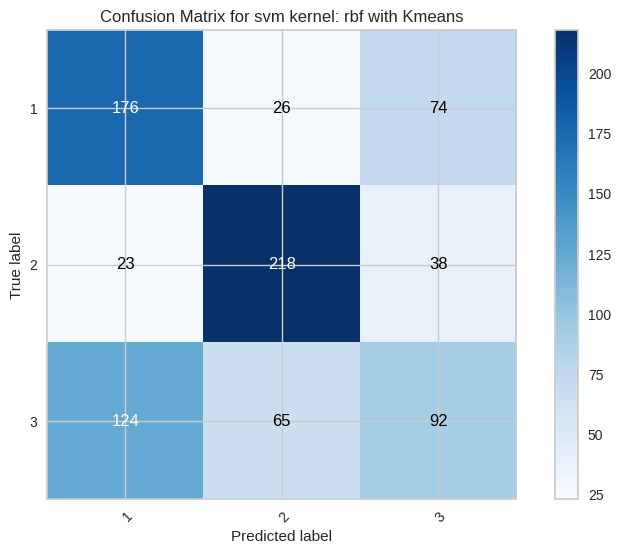

In [24]:
# khởi tạo mô hình SVM với kernel rbf
svm_rbf = SVC(kernel='rbf')

# huấn luyện mô hình trên dữ liệu huấn luyện đã được giảm chiều
svm_rbf.fit(X_train_reduced, y_train)

# sử dụng mô hình để dự đoán trên dữ liệu kiểm tra đã được giảm chiều
y_pred_rbf = svm_rbf.predict(X_test_reduced)

# tính toán các metric
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
precision_rbf = precision_score(y_test, y_pred_rbf, average='weighted')
recall_rbf = recall_score(y_test, y_pred_rbf, average='weighted')
f1_rbf = f1_score(y_test, y_pred_rbf, average='weighted')

# in kết quả các metric
print(f"Accuracy (rbf kernel): {accuracy_rbf}")
print(f"Precision (rbf kernel): {precision_rbf}")
print(f"Recall (rbf kernel): {recall_rbf}")
print(f"F1 score (rbf kernel): {f1_rbf}")

# tính toán Confusion Matrix
cm_rbf = confusion_matrix(y_test, y_pred_rbf)

# vẽ biểu đồ Confusion Matrix
fig, ax = plt.subplots()
im = ax.imshow(cm_rbf, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm_rbf.shape[1]),
       yticks=np.arange(cm_rbf.shape[0]),
       xticklabels=range(1, len(np.unique(y_train))+1), yticklabels=range(1, len(np.unique(y_train))+1),
       xlabel='Predicted label',
       ylabel='True label')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
for i in range(cm_rbf.shape[0]):
    for j in range(cm_rbf.shape[1]):
        ax.text(j, i, format(cm_rbf[i, j], 'd'),
                ha="center",va="center", color="white" if cm_rbf[i, j] > cm_rbf.max() / 2. else "black")
fig.tight_layout()
plt.title('Confusion Matrix for svm kernel: rbf with Kmeans')
plt.show()


# **So sách giữa các kernel sử dụng Kmeans**

In [27]:
import pandas as pd

from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ["Kernel", "Accuracy", "Precision", "Recall", "F1 Score"]
table.add_row(["Linear", round(accuracy_linear, 3), round(precision_linear, 3), round(recall_linear, 3), round(f1_linear, 3)])
table.add_row(["Poly", round(accuracy_poly, 3), round(precision_poly, 3), round(recall_poly, 3), round(f1_poly, 3)])
table.add_row(["RBF", round(accuracy_rbf, 3), round(precision_rbf, 3), round(recall_rbf, 3), round(f1_rbf, 3)])
table.add_row(["Sigmoid", round(accuracy_sigmoid, 3), round(precision_sigmoid, 3), round(recall_sigmoid, 3), round(f1_sigmoid, 3)])

print(table)



+---------+----------+-----------+--------+----------+
|  Kernel | Accuracy | Precision | Recall | F1 Score |
+---------+----------+-----------+--------+----------+
|  Linear |  0.566   |   0.544   | 0.566  |  0.544   |
|   Poly  |  0.434   |   0.417   | 0.434  |  0.388   |
|   RBF   |  0.581   |   0.567   | 0.581  |  0.569   |
| Sigmoid |  0.434   |   0.417   | 0.434  |  0.388   |
+---------+----------+-----------+--------+----------+


**Biểu đồ so sánh khi sử dụng kmeans**

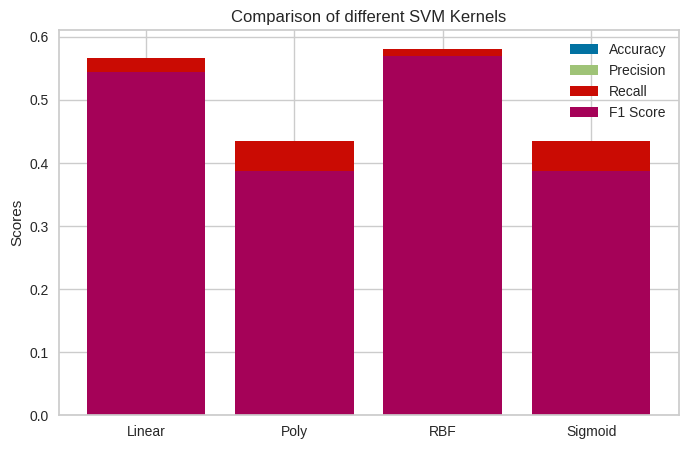

In [28]:
import matplotlib.pyplot as plt

kernels = ["Linear", "Poly", "RBF", "Sigmoid"]
accuracies = [accuracy_linear, accuracy_poly, accuracy_rbf, accuracy_sigmoid]
precisions = [precision_linear, precision_poly, precision_rbf, precision_sigmoid]
recalls = [recall_linear, recall_poly, recall_rbf, recall_sigmoid]
f1_scores = [f1_linear, f1_poly, f1_rbf, f1_sigmoid]

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(kernels, accuracies, label='Accuracy')
ax.bar(kernels, precisions, label='Precision')
ax.bar(kernels, recalls, label='Recall')
ax.bar(kernels, f1_scores, label='F1 Score')

ax.set_ylabel('Scores')
ax.set_title('Comparison of different SVM Kernels')
ax.legend()
plt.show()


**Naïve Bayes**

Accuracy: 0.5610047846889952
Precision: 0.5467938301093052
Recall: 0.5610047846889952
F1 score: 0.5519397345119107


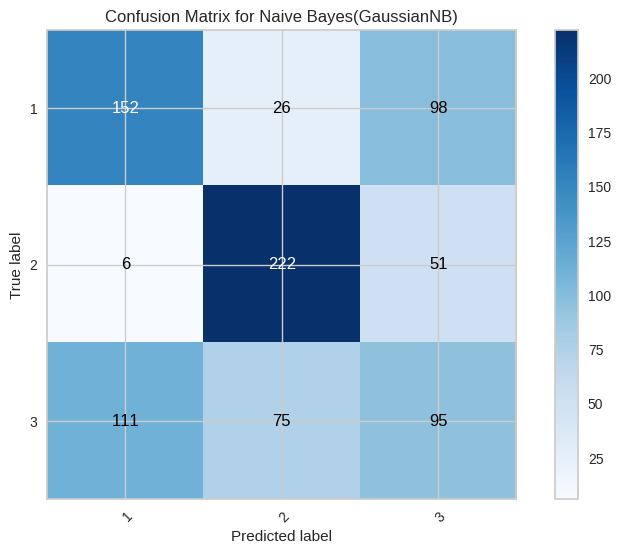

In [15]:
from sklearn.naive_bayes import GaussianNB


# tạo mô hình Naïve Bayes
nb = GaussianNB()

# huấn luyện mô hình trên tập dữ liệu huấn luyện
nb.fit(X_train, y_train)

# sử dụng mô hình để dự đoán trên tập dữ liệu kiểm tra
y_pred = nb.predict(X_test)

# tính toán các metric
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# in kết quả các metric
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")

# tính toán Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# vẽ biểu đồ Confusion Matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=range(1, len(np.unique(y_train))+1), yticklabels=range(1, len(np.unique(y_train))+1),
       xlabel='Predicted label',
       ylabel='True label')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > cm.max() / 2. else "black")
fig.tight_layout()
plt.title('Confusion Matrix for Naive Bayes(GaussianNB)')
plt.show()




**Random ForestForest**

Accuracy: 0.6423444976076556
Precision: 0.6355633227281307
Recall: 0.6423444976076556
F1 score: 0.6360112064873739


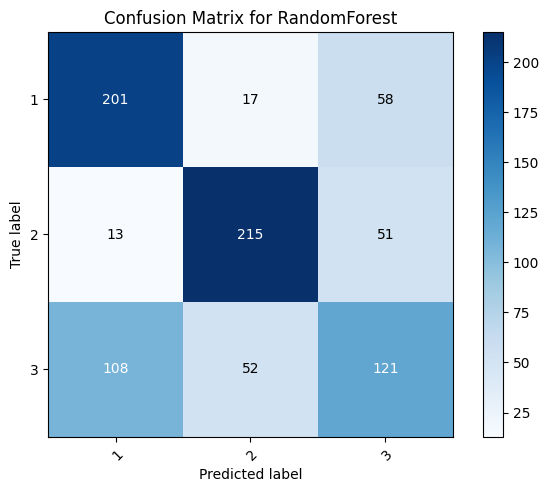

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# tạo mô hình Random Forest với số cây là 100
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# huấn luyện mô hình trên tập dữ liệu huấn luyện
rfc.fit(X_train, y_train)

# sử dụng mô hình để dự đoán trên tập dữ liệu kiểm tra
y_pred = rfc.predict(X_test)

# tính toán các metric
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# in kết quả các metric
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")

# tính toán Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# vẽ biểu đồ Confusion Matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=range(1, len(np.unique(y_train))+1), yticklabels=range(1, len(np.unique(y_train))+1),
       xlabel='Predicted label',
       ylabel='True label')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > cm.max() / 2. else "black")
fig.tight_layout()
plt.title('Confusion Matrix for RandomForest')
plt.show()


**Decision Tree**

Accuracy: 0.5753588516746412
Precision: 0.5716106804333434
Recall: 0.5753588516746412
F1 score: 0.5731835712918836


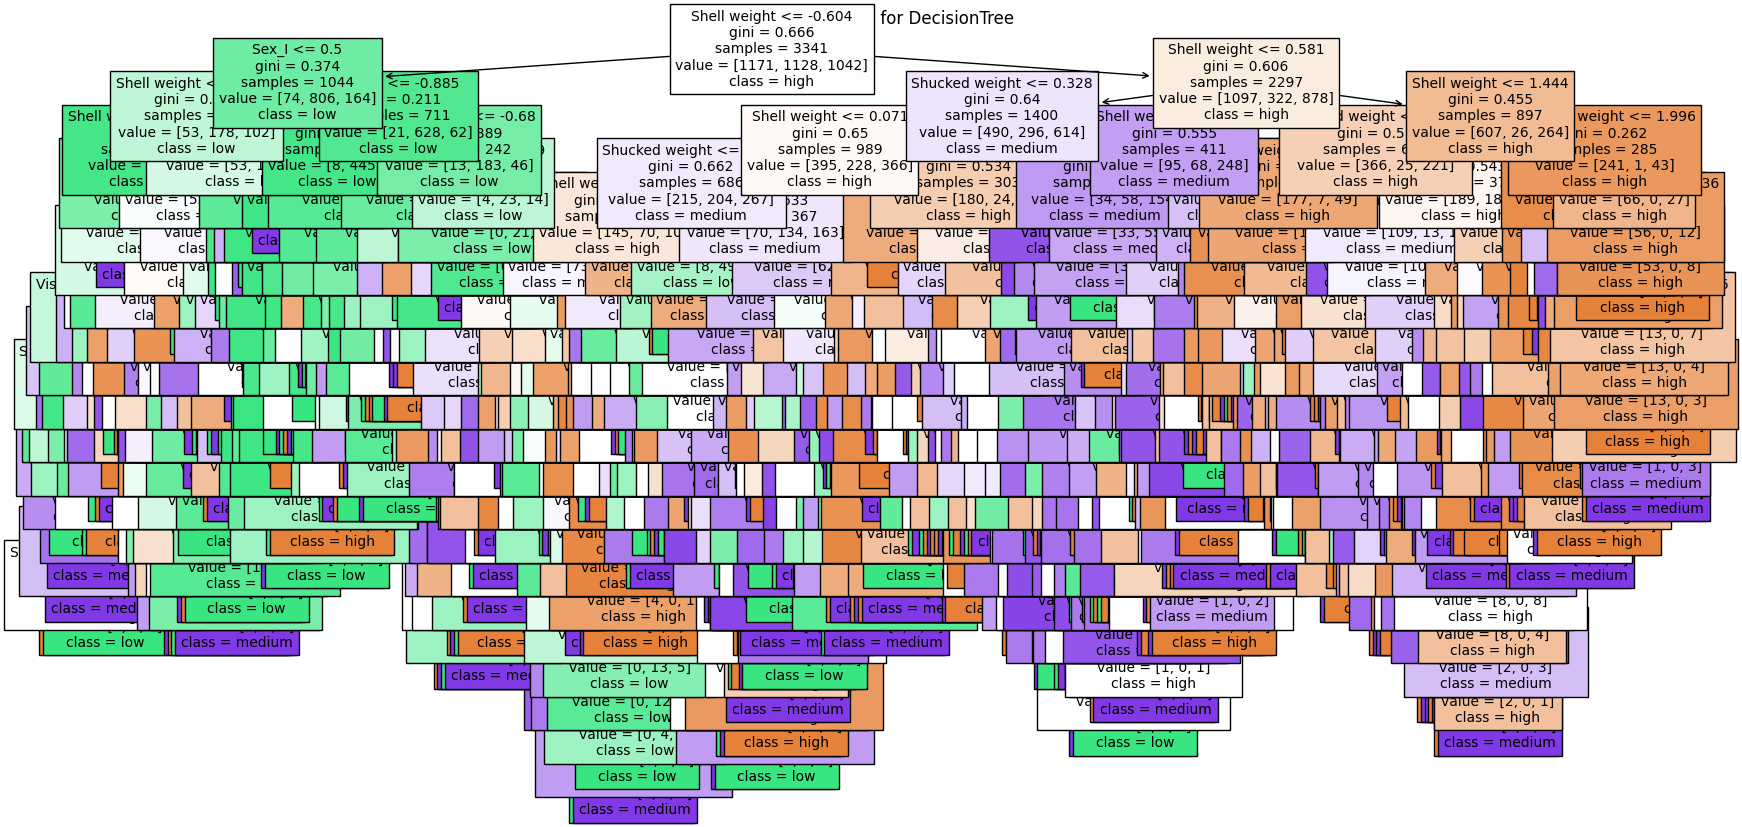

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# tạo mô hình Decision Tree
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

# sử dụng mô hình để dự đoán trên tập dữ liệu kiểm tra
y_pred = dtc.predict(X_test)

# tính toán các metric
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# in kết quả các metric
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")

# vẽ biểu đồ Decision Tree
plt.figure(figsize=(20,10))
plot_tree(dtc, filled=True, feature_names=X_train.columns, class_names=np.unique(y_train), fontsize=10)
plt.title('Confusion Matrix for DecisionTree')
plt.show()


**Logistic Regression**

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.6495215311004785
Precision: 0.6395146950957434
Recall: 0.6495215311004785
F1 score: 0.6412507367118936


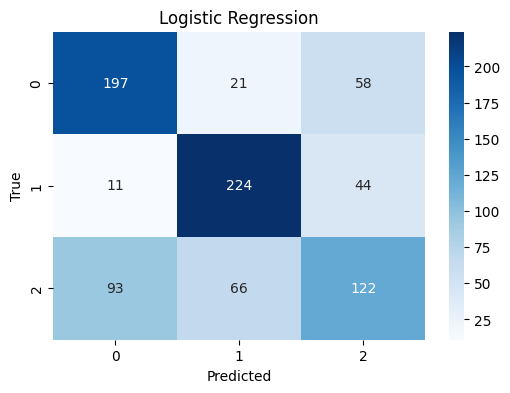

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns


# chuyển đổi biến Rings_cat thành biến số
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)

# huấn luyện mô hình Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train_le)

# sử dụng mô hình để dự đoán trên tập dữ liệu kiểm tra
y_pred_le = lr.predict(X_test)

# chuyển đổi lại các giá trị dự đoán thành các nhãn ban đầu
y_pred = le.inverse_transform(y_pred_le)

# tính toán các metric
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# in kết quả các metric
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")
# tính confusion matrix
cm = confusion_matrix(y_test, y_pred)

# vẽ heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Logistic Regression')
plt.show()


# So sánh giữa  **kNN, Naïve Bayes, RandomForest, Decision Tree**

In [5]:
# KNN
from prettytable import PrettyTable
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_precision = precision_score(y_test, knn_y_pred, average='weighted')
knn_recall = recall_score(y_test, knn_y_pred, average='weighted')
knn_f1_score = f1_score(y_test, knn_y_pred, average='weighted')

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_y_pred = nb.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_y_pred)
nb_precision = precision_score(y_test, nb_y_pred, average='weighted')
nb_recall = recall_score(y_test, nb_y_pred, average='weighted')
nb_f1_score = f1_score(y_test, nb_y_pred, average='weighted')
#random fr
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred, average='weighted')
rf_recall = recall_score(y_test, rf_y_pred, average='weighted')
rf_f1_score = f1_score(y_test, rf_y_pred, average='weighted')
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_y_pred = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_precision = precision_score(y_test, dt_y_pred, average='weighted')
dt_recall = recall_score(y_test, dt_y_pred, average='weighted')
dt_f1_score = f1_score(y_test, dt_y_pred, average='weighted')
# creating PrettyTable

table = PrettyTable()
table.field_names = ["Algorithm", "Accuracy", "Precision", "Recall", "F1 Score"]
table.add_row(["KNN", knn_accuracy, knn_precision, knn_recall, knn_f1_score])
table.add_row(["Naive Bayes", nb_accuracy, nb_precision, nb_recall, nb_f1_score])
table.add_row(["Random Forest", rf_accuracy, rf_precision, rf_recall, rf_f1_score])
table.add_row(["Decision Tree", dt_accuracy, dt_precision, dt_recall, dt_f1_score])
print(table)


+---------------+--------------------+--------------------+--------------------+--------------------+
|   Algorithm   |      Accuracy      |     Precision      |       Recall       |      F1 Score      |
+---------------+--------------------+--------------------+--------------------+--------------------+
|      KNN      | 0.611244019138756  | 0.600215621127924  | 0.611244019138756  | 0.6011440917677388 |
|  Naive Bayes  | 0.5610047846889952 | 0.5467938301093052 | 0.5610047846889952 | 0.5519397345119107 |
| Random Forest | 0.6423444976076556 | 0.6355633227281307 | 0.6423444976076556 | 0.6360112064873739 |
| Decision Tree | 0.5753588516746412 | 0.5716106804333434 | 0.5753588516746412 | 0.5731835712918836 |
+---------------+--------------------+--------------------+--------------------+--------------------+


**Sơ đồ so sánh**

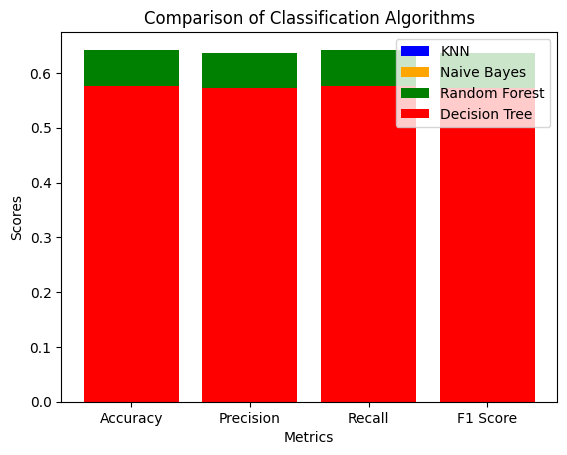

In [7]:
import matplotlib.pyplot as plt

# Tạo một danh sách các độ đo đánh giá
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]

# Tạo một danh sách các giá trị của các độ đo tương ứng
knn_scores = [knn_accuracy, knn_precision, knn_recall, knn_f1_score]
nb_scores = [nb_accuracy, nb_precision, nb_recall, nb_f1_score]
rf_scores = [rf_accuracy, rf_precision, rf_recall, rf_f1_score]
dt_scores = [dt_accuracy, dt_precision, dt_recall, dt_f1_score]

# Vẽ sơ đồ cột
# Thiết lập màu cho từng loại thuật toán
colors = ['blue', 'orange', 'green', 'red']

# Vẽ sơ đồ cột
plt.bar(metrics, knn_scores, color=colors[0], label="KNN")
plt.bar(metrics, nb_scores, color=colors[1], label="Naive Bayes")
plt.bar(metrics, rf_scores, color=colors[2], label="Random Forest")
plt.bar(metrics, dt_scores, color=colors[3], label="Decision Tree")


# Thêm các chú thích và tên trục
plt.title("Comparison of Classification Algorithms")
plt.xlabel("Metrics")
plt.ylabel("Scores")
plt.legend()

# Hiển thị sơ đồ
plt.show()


**Clustering**
1. KMeans
2.  Agglomerative Clustering

Để áp dụng các thuật toán Clustering trên tập dữ liệu Abalone, ta cần xác định số lượng cluster phù hợp bằng cách sử dụng phương pháp Elbow và Silhouette.

Đầu tiên, ta sẽ thực hiện phương pháp Elbow trên tập dữ liệu và vẽ biểu đồ để xác định số lượng cluster phù hợp.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

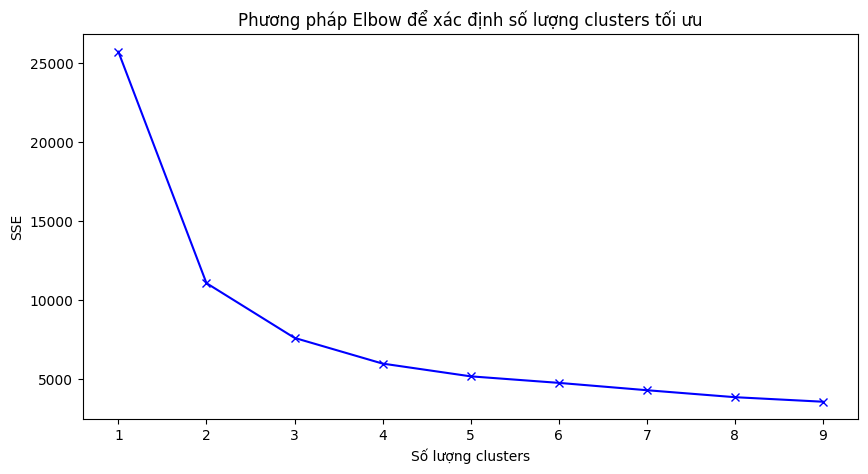

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


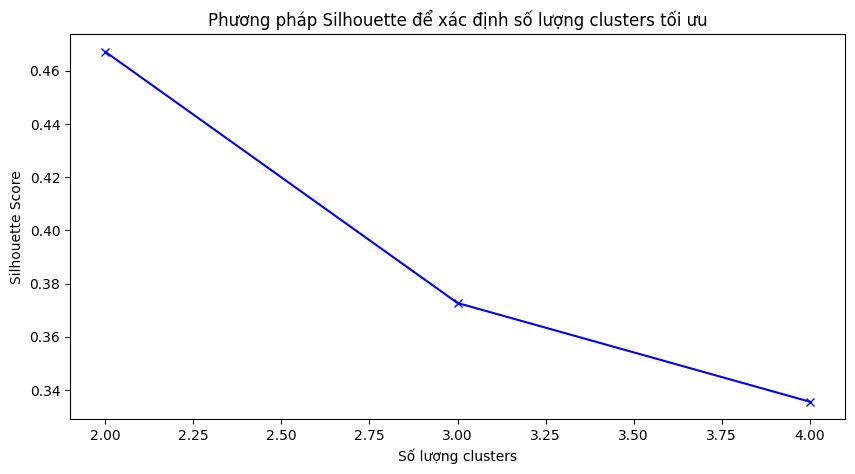

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Thực hiện phương pháp Elbow
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_train)
    kmeanModel.fit(X_train)
    distortions.append(kmeanModel.inertia_)

# Vẽ biểu đồ Elbow
plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Số lượng clusters')
plt.ylabel('SSE')
plt.title('Phương pháp Elbow để xác định số lượng clusters tối ưu')
plt.show()
# Thực hiện phương pháp Silhouette
silhouette_scores = []
K = range(2, 5)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_train)
    labels = kmeanModel.labels_
    silhouette_scores.append(silhouette_score(X_train, labels))

# Vẽ biểu đồ Silhouette
plt.figure(figsize=(10,5))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Số lượng clusters')
plt.ylabel('Silhouette Score')
plt.title('Phương pháp Silhouette để xác định số lượng clusters tối ưu')
plt.show()


Biểu đồ cho thấy Silhouette Score cao nhất ở số lượng cluster là 2.

Vậy, ta sẽ sử dụng 2 clusters để áp dụng thuật toán KMeans và vẽ biểu đồ.

**KMeans**

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


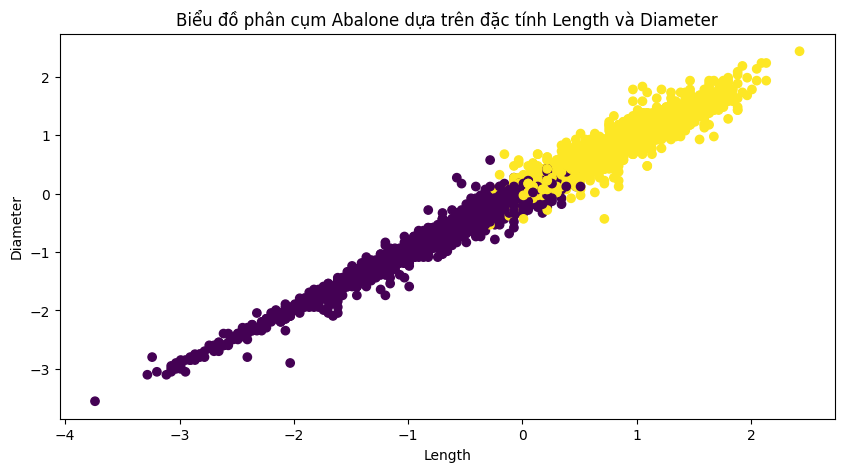

In [ ]:
# Áp dụng thuật toán KMeans với số lượng clusters là 2
kmeanModel = KMeans(n_clusters=2).fit(X_train)
labels = kmeanModel.labels_

# Vẽ biểu đồ scatter plot
plt.figure(figsize=(10,5))
plt.scatter(X_train['Length'], X_train['Diameter'], c=labels, cmap='viridis')
plt.xlabel('Length')
plt.ylabel('Diameter')
plt.title('Biểu đồ phân cụm Abalone dựa trên đặc tính Length và Diameter sử dụng KMeans')
plt.show()


**AgglomerativeClustering**

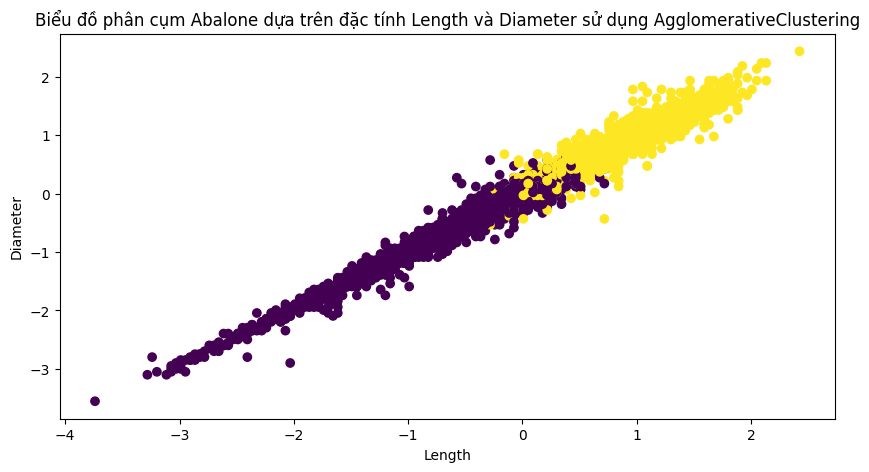

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Áp dụng thuật toán AgglomerativeClustering
agglomModel = AgglomerativeClustering(n_clusters=2).fit(X_train)
labels = agglomModel.labels_

# Vẽ biểu đồ scatter plot
plt.figure(figsize=(10,5))
plt.scatter(X_train['Length'], X_train['Diameter'], c=labels, cmap='viridis')
plt.xlabel('Length')
plt.ylabel('Diameter')
plt.title('Biểu đồ phân cụm Abalone dựa trên đặc tính Length và Diameter sử dụng AgglomerativeClustering')
plt.show()
